Entendendo o problema

Existem diversas frentes de enfretamento a fome, uma delas é o pilar da agricultura técnológica,
Nesse sentido um pesquisador está desenvolvendo uma nova espécie de tomate que possui maior resistência ao fungo Phytophthora.
O resultado foi salvo em um banco de dados e os resultados serão usados para treinarmos um modelo de machine learning, para classificar os tipos de tomate com resistência para prevermos que tomates desta espécie terão resistência ou não.

Qual será o tipo do modelo aplicado e porquê?

Sabendo do nosso problema, a escolha foi um modelo supervisionado de classificação, pois já temos os resultados e queremos descobrir os meios para saber como chegar a classe pertencente dos tomates e é classificado, justamente porque queremos classificar se o tomate possui resistência ou não.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Para usar links do github, adicione "?raw=true" ao fim do link, caso não use, utilize apenas o próprio link.
    
url = 'https://github.com/sarviovalente/dataset_tomate/blob/main/dataset_tomate.csv?raw=true'

#dataframe em formato csv da url
df = pd.read_csv(url, index_col=1)

In [3]:
#5 primeiras linhas do nosso dataframe
df.head()

,id,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,...,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
trat,,,,,,,,,,,,,,,,,,,,,
102,1,0.798284,1.197380,0.692652,16710.29721,9.728142,0.729767,1.094620,0.698726,21499.94698,...,1.069718,0.662425,13090.11459,6.216968,0.684125,1.026146,0.636865,13352.81776,5.421333,1
11,2,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,30041.91766,...,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860,0
103,3,0.825104,1.237610,0.708468,18074.06986,11.141408,0.786941,1.180385,0.730471,29312.17626,...,1.096008,0.680238,12330.21702,6.670915,0.728171,1.092214,0.655206,15313.16198,6.551268,1
112,4,0.788884,1.183279,0.664787,16226.23017,8.990752,0.743874,1.115782,0.690141,22610.47885,...,1.061948,0.644786,12085.07787,6.017714,0.728161,1.092201,0.640739,16562.17418,6.608121,1
114,5,0.764986,1.147432,0.673490,14920.80711,8.269806,0.715948,1.073894,0.695619,22002.08151,...,1.032176,0.660206,10053.17885,5.571702,0.694320,1.041437,0.642373,13760.95583,5.665567,1


In [4]:
#vendo as colunas dos dataframe e seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 102 to 93
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          132 non-null    int64  
 1   NDVI_d28    132 non-null    float64
 2   SAVI_d28    132 non-null    float64
 3   GNDVI_d28   132 non-null    float64
 4   MCARI1_d28  132 non-null    float64
 5   SR_d28      132 non-null    float64
 6   NDVI_d01    132 non-null    float64
 7   SAVI_d01    132 non-null    float64
 8   GNDVI_d01   132 non-null    float64
 9   MCARI1_d01  132 non-null    float64
 10  SR_d01      132 non-null    float64
 11  NDVI_d04    132 non-null    float64
 12  SAVI_d04    132 non-null    float64
 13  GNDVI_d04   132 non-null    float64
 14  MCARI1_d04  132 non-null    float64
 15  SR_d04      132 non-null    float64
 16  NDVI_d08    132 non-null    float64
 17  SAVI_d08    132 non-null    float64
 18  GNDVI_d08   132 non-null    float64
 19  MCARI1_d08  132 non-null    

In [5]:
#número de linhas e coluna
df.shape

(132, 22)

In [6]:
#agrupando pro classe e vendo o número por classe
print(df.groupby('Classe').size())

Classe
0    41
1    91
dtype: int64


In [7]:
df.describe()

,id,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,...,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,0.780023,1.169990,0.674060,16462.800069,9.124822,0.754009,1.130988,0.699398,27444.185075,...,1.092219,0.660012,14519.771222,6.762840,0.719198,1.078754,0.657604,15001.133221,6.479522,0.689394
std,38.249183,0.035999,0.053999,0.034849,1709.098541,1.433713,0.032205,0.048308,0.030261,3711.784699,...,0.043631,0.028366,2654.859976,0.909740,0.033993,0.050991,0.028864,2563.017213,1.153460,0.464505
min,1.000000,0.649085,0.973586,0.556922,11005.355800,4.789961,0.635930,0.953869,0.592644,18122.404820,...,0.964381,0.552340,9431.856566,4.653617,0.655962,0.983908,0.582567,11463.913340,4.902359,0.000000
25%,33.750000,0.772210,1.158270,0.669149,15640.851240,8.573545,0.744248,1.116344,0.695318,24887.192403,...,1.065336,0.650594,12726.575570,6.150417,0.694633,1.041907,0.642005,13312.951140,5.712593,0.000000
50%,66.500000,0.788128,1.182145,0.680441,16762.631610,9.323441,0.761036,1.141527,0.705402,27679.685570,...,1.097308,0.665373,14091.257330,6.728679,0.712214,1.068278,0.651413,14295.935300,6.146371,1.000000
75%,99.250000,0.803054,1.204534,0.694304,17570.790822,10.112440,0.773866,1.160773,0.714582,30054.630575,...,1.119825,0.676848,15864.872955,7.312529,0.728163,1.092204,0.671040,15673.598085,6.559074,1.000000
max,132.000000,0.827867,1.241756,0.719607,19574.211170,11.798039,0.803978,1.205944,0.738357,36639.936610,...,1.185812,0.716056,23387.232530,8.930666,0.816574,1.224826,0.728204,23276.959950,10.377763,1.000000


In [8]:
#vendo que classes temos na coluna Classe
df.Classe.unique()

array([1, 0], dtype=int64)

Os metódos a cima foram utilizados para descobrir que tabelas temos, quais valores, seus tipos, número de colunas e linhas, descobrir nosso dado categórico, que confirmamos ser a coluna "Classe", seus valores únicos e quantidade por categória.

Matriz de correlação
A matriz de correlação avalia a relação entre duas ou mais variaveis (correlação). Por padrão, o cálculo utilizado é através do método de correlação de Peason.

valores:

0.9 a 1 positivo ou negativo indica uma correlação muito forte.

0.7 a 0.9 positivo ou negativo indica uma correlação forte.

0.5 a 0.7 positivo ou negativo indica uma correlação moderada.

0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

0 a 0.3 positivo ou negativo indica uma correlação desprezível.

lembre que: alta correlação não implica em causa. (causa e consequência)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

<AxesSubplot:>

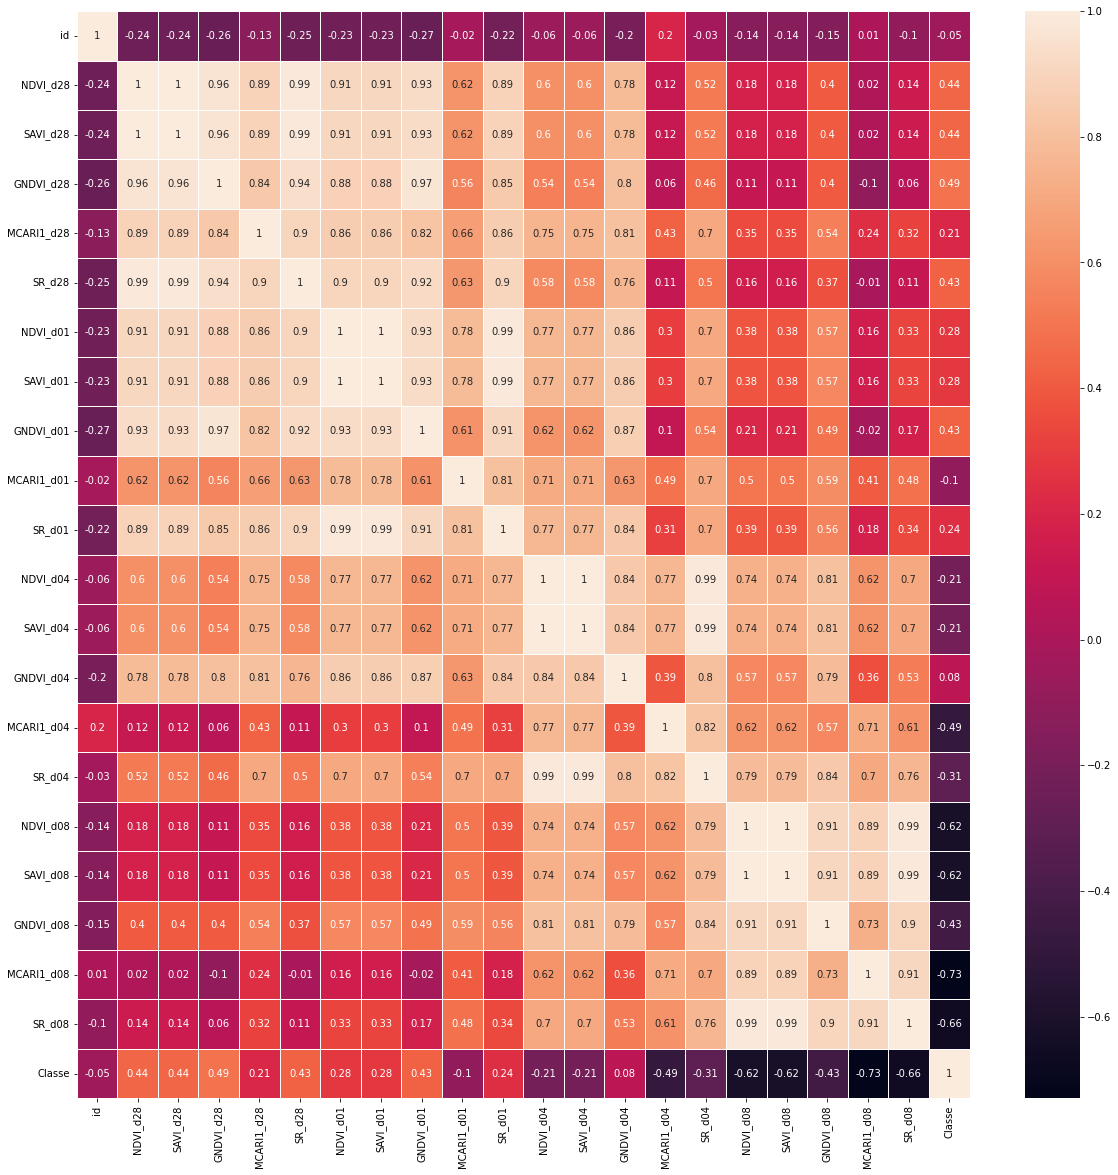

In [9]:
import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [10]:
#Colunas do nosso dataset
df.keys()

Index(['id', 'NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28', 'SR_d28',
       'NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01', 'NDVI_d04',
       'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04', 'NDVI_d08', 'SAVI_d08',
       'GNDVI_d08', 'MCARI1_d08', 'SR_d08', 'Classe'],
      dtype='object')

Pelo nosso gráfico de correlação vemos que as colunas 'NDVI_d08', 'SAVI_d08', 'MCARI1_d08', 'SR_d08', possuem maior correlação, ou seja maior influência para determinar a nossa classe, como temos um grande dataframe, é ótimo filtrar e descobrir quais são seus maiores influenciadores, assim aproveitamos para fazer uma análise gráfica em cima destes grandes influênciadores

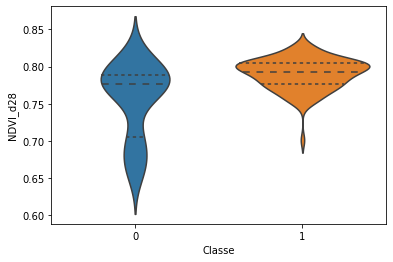

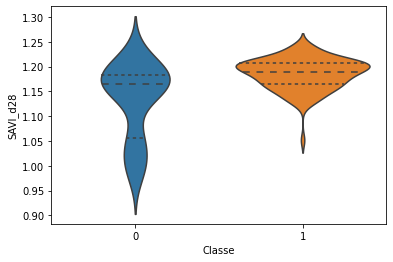

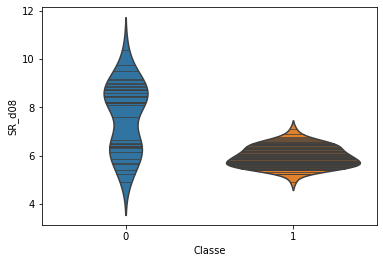

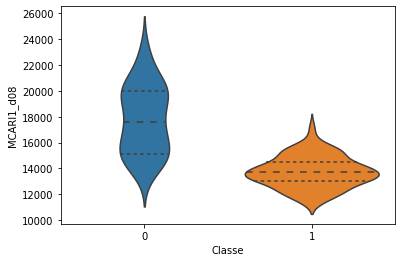

In [11]:
#Gráficos de violinos com uma coluna específica

g = sns.violinplot(y='NDVI_d28', x='Classe', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SAVI_d28', x='Classe', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='SR_d08', x='Classe', data=df, inner='stick')
plt.show()
g = sns.violinplot(y='MCARI1_d08', x='Classe', data=df, inner='quartile')
plt.show()

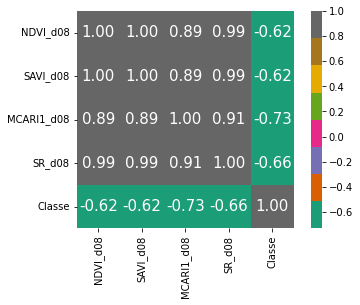

In [12]:
#Tabela de correlação
cols = ['NDVI_d08', 'SAVI_d08', 'MCARI1_d08', 'SR_d08','Classe']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

In [46]:
#Subdataset do nosso dataframe
correlacao = df[['NDVI_d08', 'SAVI_d08', 'MCARI1_d08', 'SR_d08','Classe']]

#classes = df['Classe']

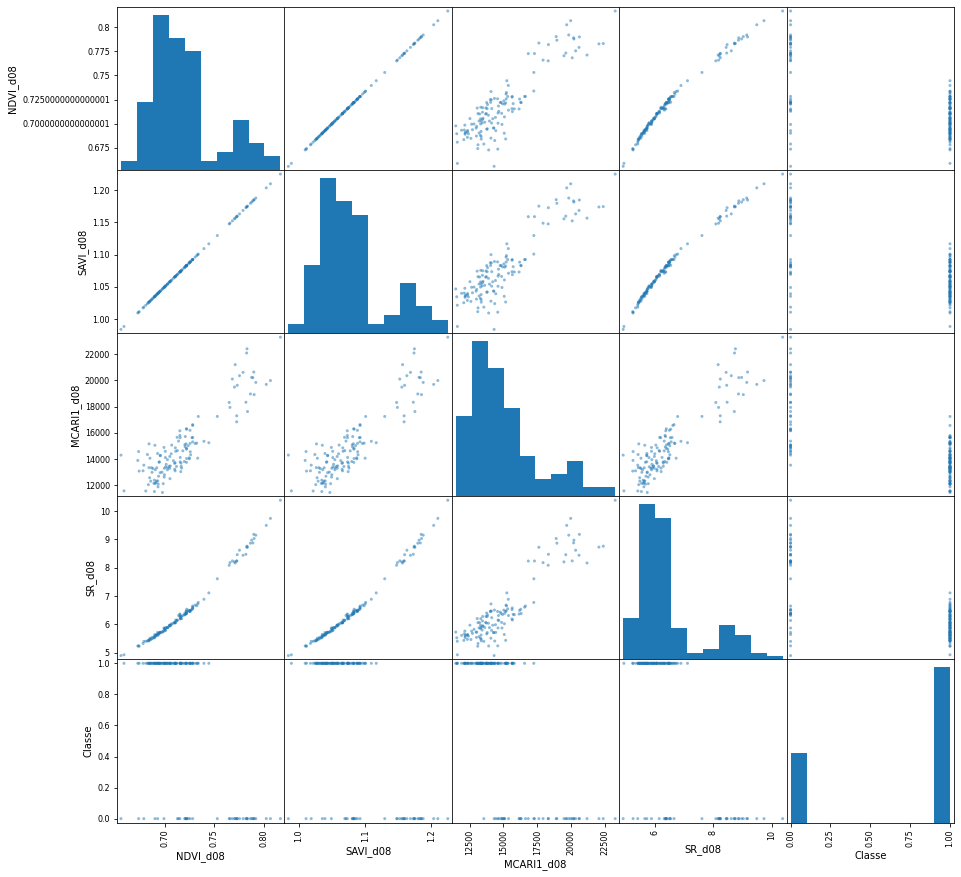

In [47]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(correlacao,figsize=(15, 15))
plt.show()

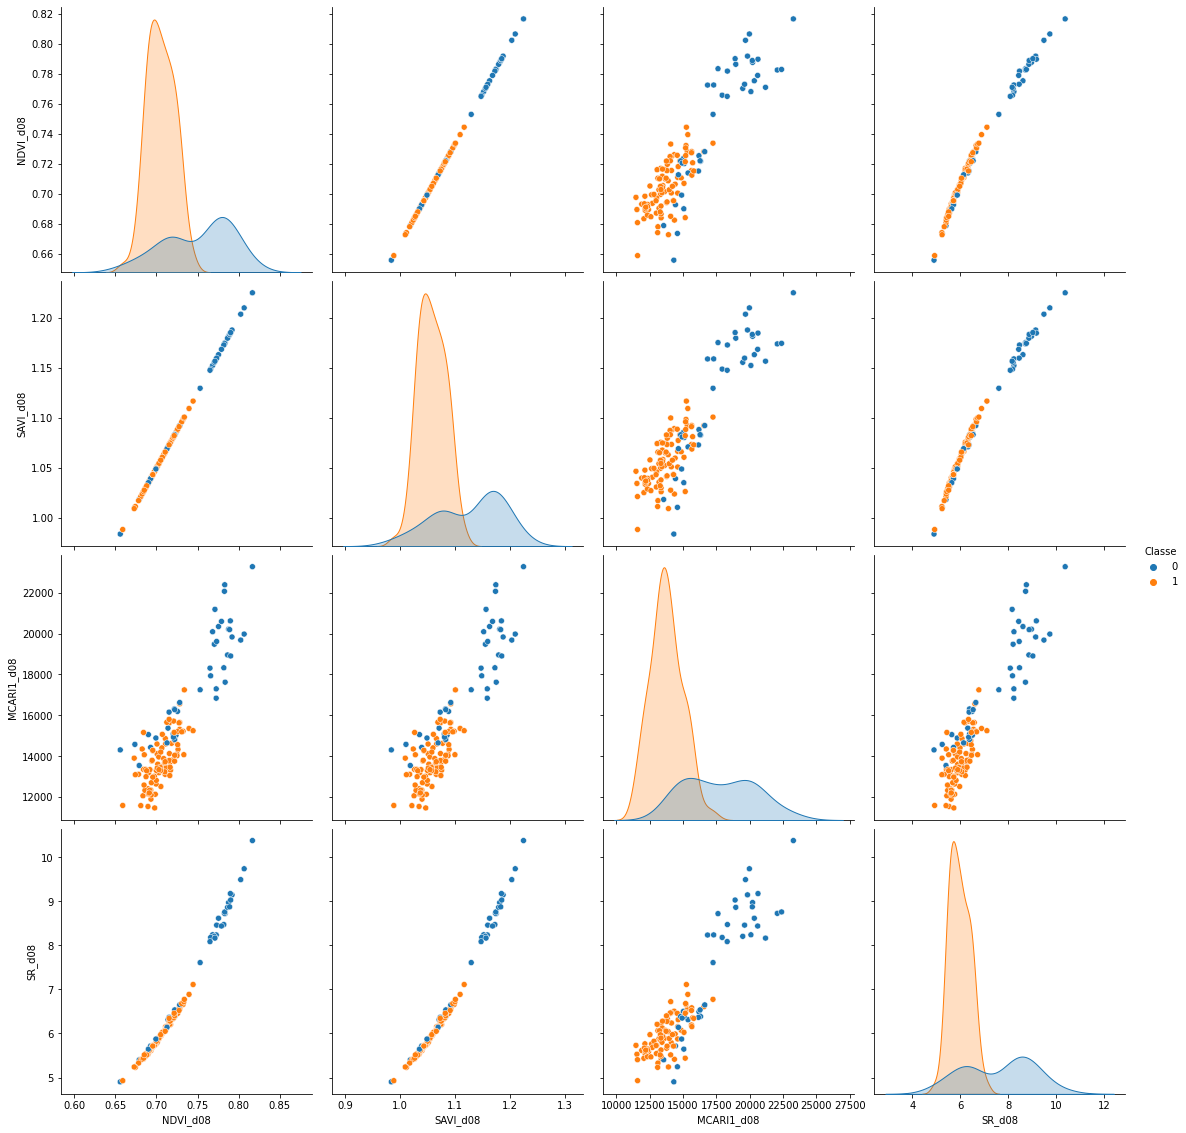

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# A cor vem do campo `Classe` do dataframe
sns.pairplot(correlacao, hue='Classe', height=4)
plt.show()

c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


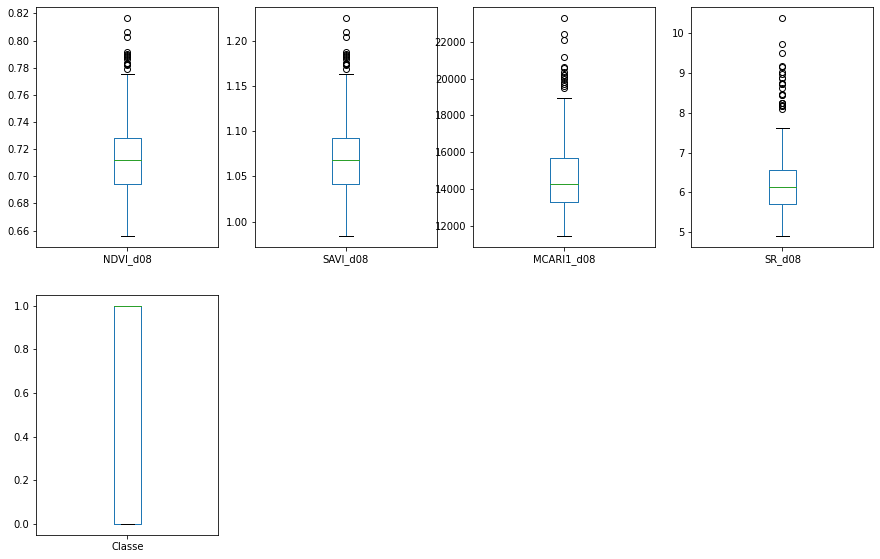

In [49]:
# box and whisker plots
correlacao.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

In [50]:
print(correlacao.groupby('Classe').size())

Classe
0    41
1    91
dtype: int64


In [18]:
# Selecionando um sub-dataframe com os campos 'NDVI_d08', 'SAVI_d08', 'MCARI1_d08', 'SR_d08', 
# e outro com a variável de classe
entradas = df[['NDVI_d08', 'SAVI_d08', 'MCARI1_d08', 'SR_d08']]
classes = df['Classe']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (132, 4) e classes (132,)


In [19]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (105, 4) e teste (27, 4)


In [20]:
#5 primeiras dos valores das linhas do subdataset de treino
entradas_treino.head()

,NDVI_d08,SAVI_d08,MCARI1_d08,SR_d08
trat,,,,
233,0.689121,1.033634,12155.99181,5.533901
13,0.721819,1.082688,16312.51025,6.385158
112,0.728161,1.092201,16562.17418,6.608121
254,0.693504,1.040208,12096.72054,5.668529
11,0.725521,1.088240,16190.82038,6.491860


In [21]:
#5 primeiras dos valroes das classes das linhas do subdataset de treino
classes_treino.head()

trat
233    1
13     0
112    1
254    1
11     0
Name: Classe, dtype: int64

In [22]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 4
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=4)

Aqui fazemos um teste prevendo os valores das classes de algumas linhas de teste

In [23]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1]


c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Aqui vemos quanto de acerto nosso modelo está tendo, estamos com pouco mais de 92% de acerto!

In [24]:
# Para determinar a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.8518518518518519


In [25]:
# Criamos um modelo utilizando duas entradas e uma saida, logo temos que passar duas entradas para o modelo faça a predição. 

modelo.predict([[0.658993,0.988445,11584.92863,4.928687]])

c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [26]:
#5 primeiras dos valores das linhas do subdataset de teste
entradas_teste.head()

,NDVI_d08,SAVI_d08,MCARI1_d08,SR_d08
trat,,,,
71,0.705159,1.057696,14201.17261,5.973568
242,0.719791,1.079641,13817.81919,6.332899
264,0.705120,1.057635,13301.50739,5.969795
34,0.771039,1.156524,21187.49956,8.164349
154,0.705325,1.057941,12513.64135,5.973544


In [27]:
#5 primeiras dos valroes das classes das linhas do subdataset de treino
classes_teste.head()

trat
71     1
242    1
264    1
34     0
154    1
Name: Classe, dtype: int64

In [28]:
# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="Classe", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


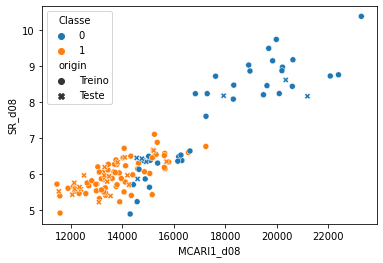

In [31]:
import seaborn as sns
## Unificamos os dataframes de treinamento e teste em um novo DataFrame
# indicando a origem dos dados
novo_df = pd.concat((df_treino, df_teste), keys=['train', 'test'])
novo_df['origin'] = ''
novo_df.loc['train','origin'] = 'Treino'
novo_df.loc['test','origin'] = 'Teste'

# Usamos o scatterplot do seaborn, informando mudando o marcador de acordo com a origem do dado
sns.scatterplot( 'MCARI1_d08', 'SR_d08', hue='Classe', style='origin', data=novo_df)

plt.show()

c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\novo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, bu

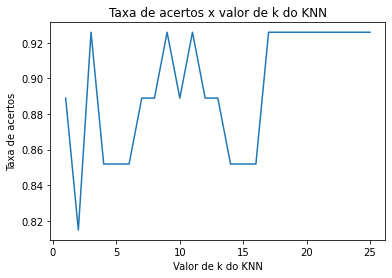

In [32]:
# loop for para diferntes k
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))
  
  
plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


Aqui vemos qual o valor de "K", melhor para nosso modelo, utilizando valores de 3 a 4, obtemos um grande pico de acerto!
E porque utilizei 4 colunas? Em vez de 2 ou 3? Bom, utilizando estas 4, eu obtive maior taxa de acerto, sem que meu programa tivesse overfit, assim como obtive melhor taxa de acerto, ao usar 20% do dataframe como teste, em vez de 25% ou 30%.